In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import PCA

X = pd.read_csv('train_self_feature.csv')
y = pd.read_csv('train_label.csv')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=694)

forest = RandomForestClassifier(random_state=695)   
cv_results = cross_validate(forest, X_train, y_train, cv=5)
cv_results['test_score']

array([0.70869637, 0.71252043, 0.71195057, 0.70871137, 0.70611259])

In [3]:
clf = RandomForestClassifier(random_state=695)   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7141948796698419

In [4]:
adaboost = AdaBoostClassifier(random_state=695)   

cv_results = cross_validate(adaboost, X_train, y_train, cv=5)
cv_results['test_score']

array([0.65527946, 0.66016826, 0.65593929, 0.65659913, 0.65513932])

In [5]:
clf = AdaBoostClassifier(random_state=695)   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6512344938455263

In [6]:
g_boost = GradientBoostingClassifier(random_state=695)   

cv_results = cross_validate(g_boost, X_train, y_train, cv=5)
cv_results['test_score']

array([0.66430724, 0.67171543, 0.66756145, 0.66843123, 0.66815632])

In [7]:
clf = GradientBoostingClassifier(random_state=695)   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6635554382513137

In [8]:
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=-1, random_state=694)
model.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)], verbose = 20)

[20]	training's binary_logloss: 0.60153	valid_0's binary_logloss: 0.605651
[40]	training's binary_logloss: 0.587609	valid_0's binary_logloss: 0.594083
[60]	training's binary_logloss: 0.580304	valid_0's binary_logloss: 0.588484
[80]	training's binary_logloss: 0.575552	valid_0's binary_logloss: 0.585548
[100]	training's binary_logloss: 0.571501	valid_0's binary_logloss: 0.583208


LGBMClassifier(random_state=694)

In [9]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.6887383253252712, 0.6746766801833145)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

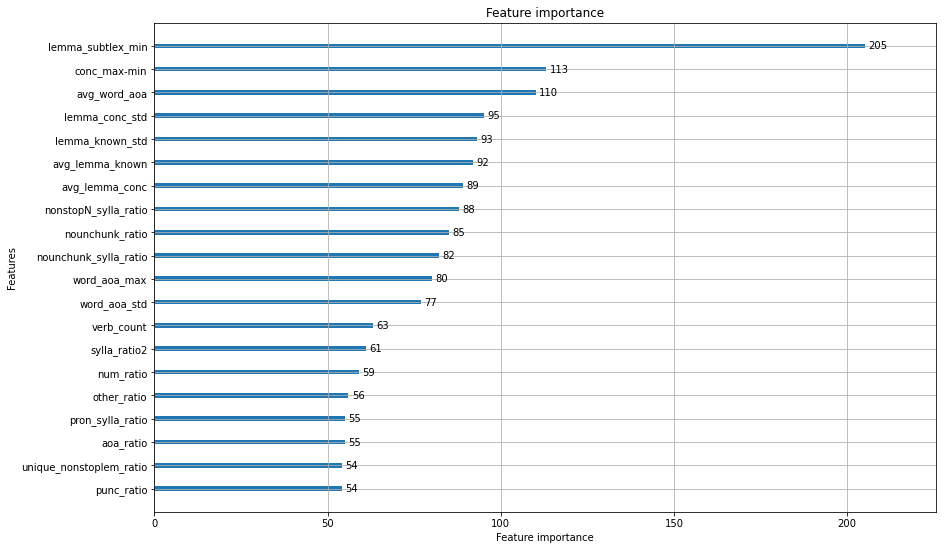

In [10]:
lgb.plot_importance(model, max_num_features = 20, figsize=(14,9))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

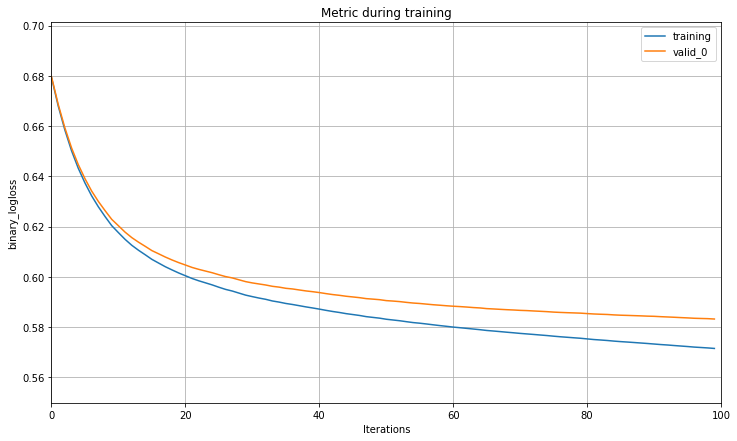

In [11]:
lgb.plot_metric(model,figsize=(12,7))